# Краткое напоминание про сверточные НС

Краткое напоминание про сверточные НС
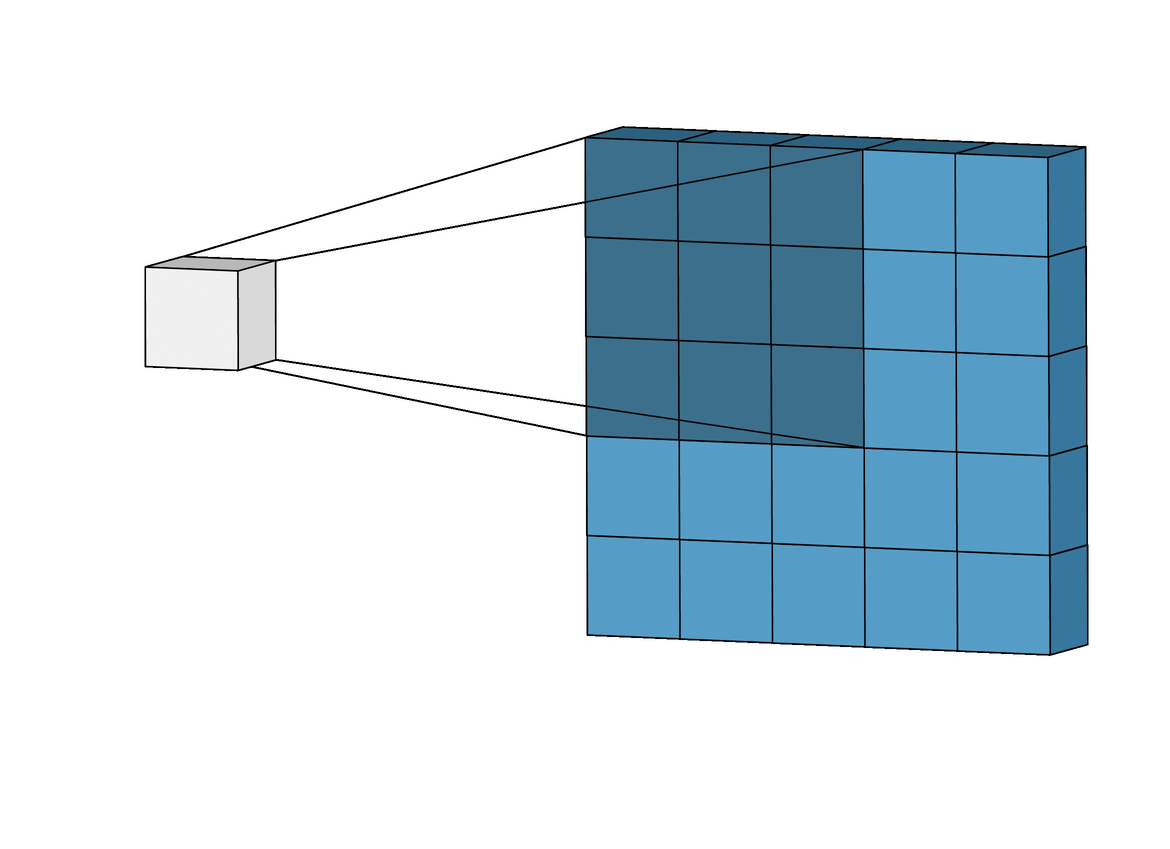

Операция свертки + Padding + Stride

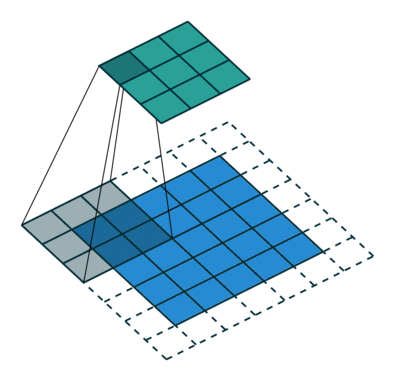

Генерация признаков

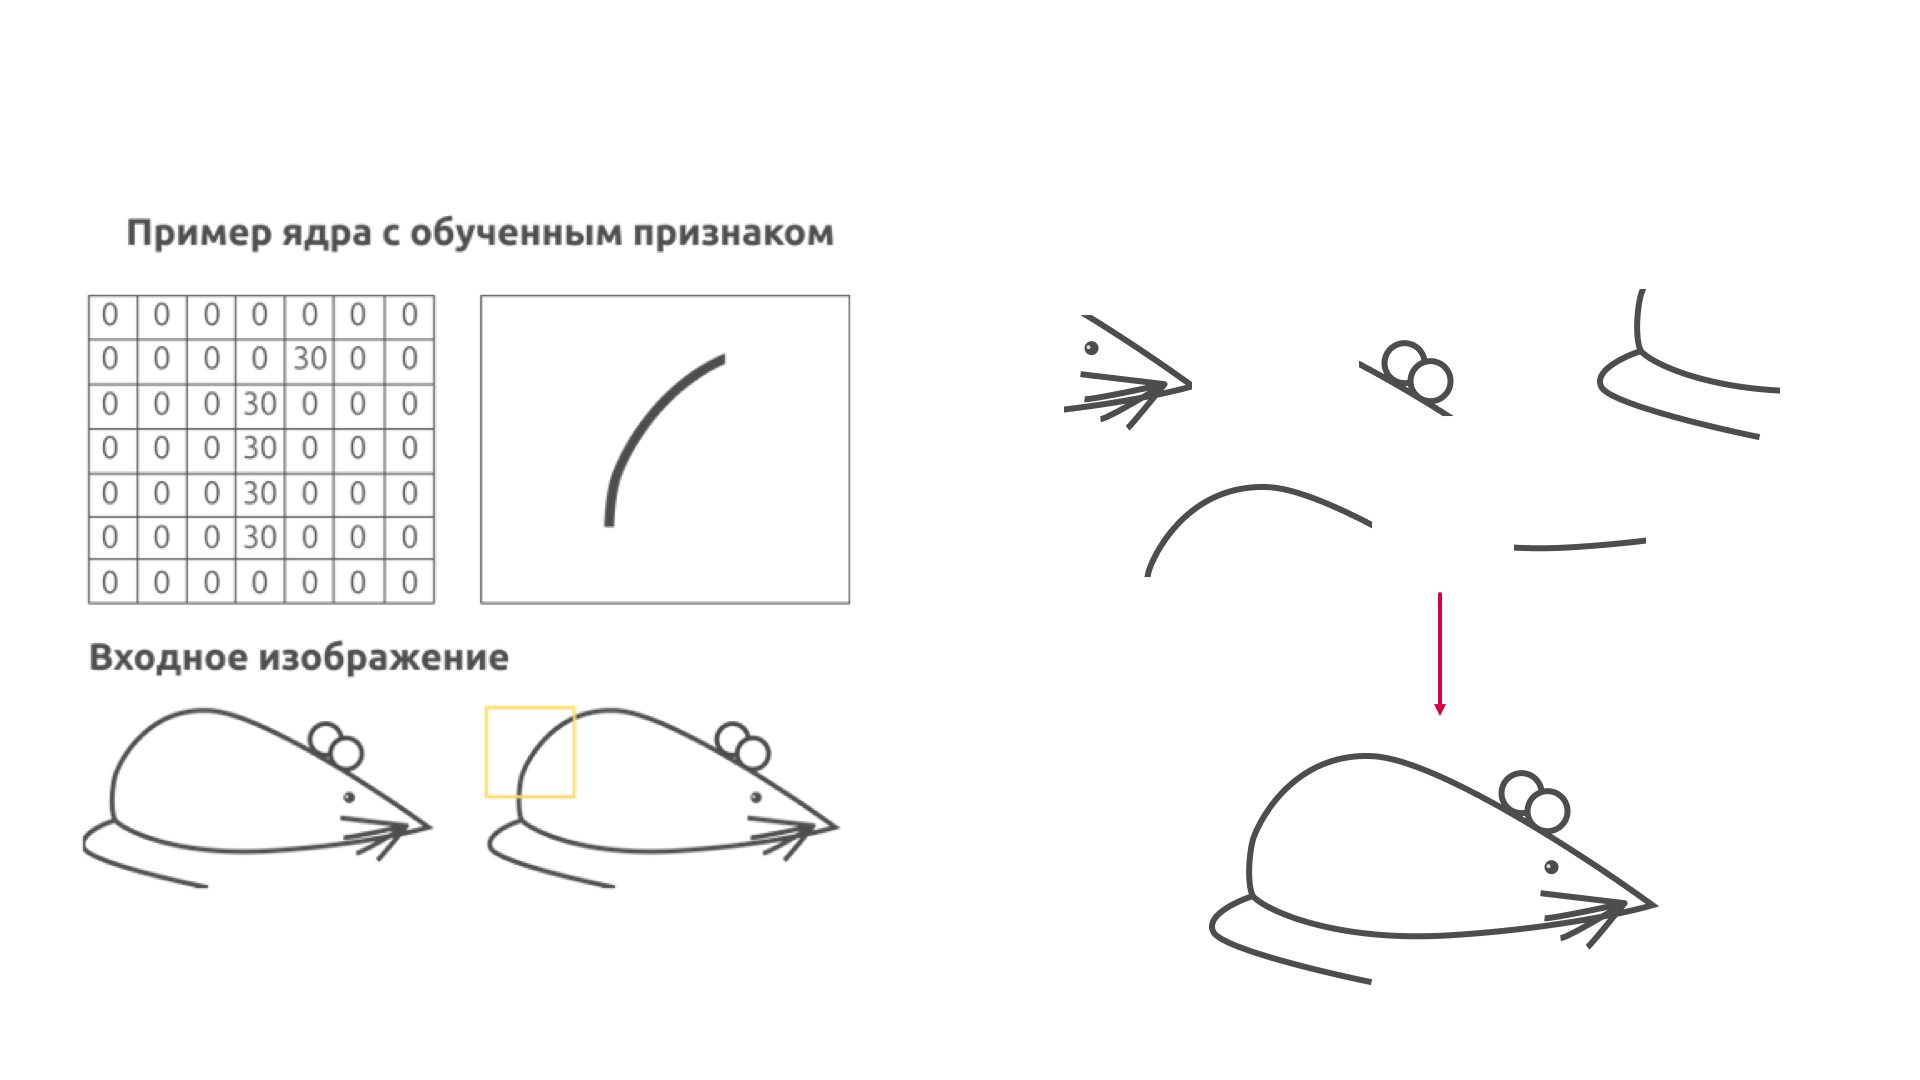

# Индивидуальное задание

Теперь рассмотрим сегментирование изображений с помощью глубоких нейросетевых архитектур на примере Mask R-CNN.

Мы воспользуемся уже обученной моделью. Сначала надо доустановить требуемые библиотеки.

In [ ]:
!pip install -q --upgrade pip
!pip install -q keras==2.3.0
!pip install -q 'h5py<3.0.0'
!pip install -q -U numpy==1.18.5
!pip install -q tensorflow==1.14
!pip install -q PyYaml==5.3.1
import tensorflow
!git clone https://github.com/matterport/Mask_RCNN.git
!pip3 -q install mrcnn
!pip install  -r /content/Mask_RCNN/requirements.txt
!python /content/Mask_RCNN/setup.py install
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Создаем конфигурацию, определяем поля

In [ ]:
class MaskRCNNConfig(Config):
    NAME = "coco_pretrained_model_config"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.8 # минимальный процент отображения прямоугольника
    NUM_CLASSES = 81

Загружаем файл с весами

In [ ]:
import os
import mrcnn.utils
DATASET_FILE = "mask_rcnn_coco.h5"
if not os.path.exists(DATASET_FILE):
    mrcnn.utils.download_trained_weights(DATASET_FILE)

... done downloading pretrained model!


Создаем модель

In [ ]:
model = modellib.MaskRCNN(mode="inference", model_dir=os.getcwd(), config=MaskRCNNConfig())

Загружаем веса

In [ ]:
model.load_weights(DATASET_FILE, by_name=True)

Из директории Mask_RCNN/images/ выбираем файл

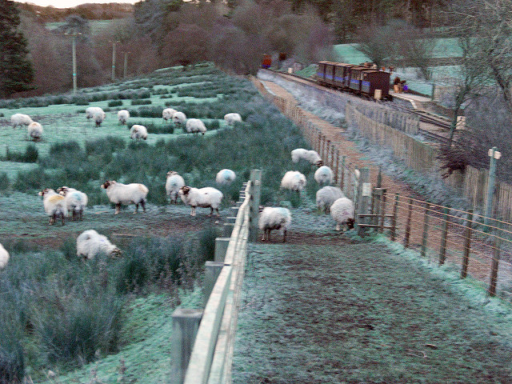

In [ ]:
import random
import cv2
import imutils
from google.colab.patches import cv2_imshow


img_path = '/content/Comp_Vision_Task_5_File_18.jpg'

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
cv2_imshow(image) 

Запускаем модель

In [ ]:
r = model.detect([image], verbose=1)[0]

Processing 1 images
image                    shape: (384, 512, 3)         min:    1.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


Данная модель способна определить более 80 различных объектов. Соответствующий файл скачивается в формате .json, который нетрудно распарсить средствами питона. Но для данной темы достаточно определить эти типы объектов явным образом.

In [ ]:
CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 

Что мы ожидаем увидеть? На выбранном изображении модель найдет все объекты из списка и сегментирует их.

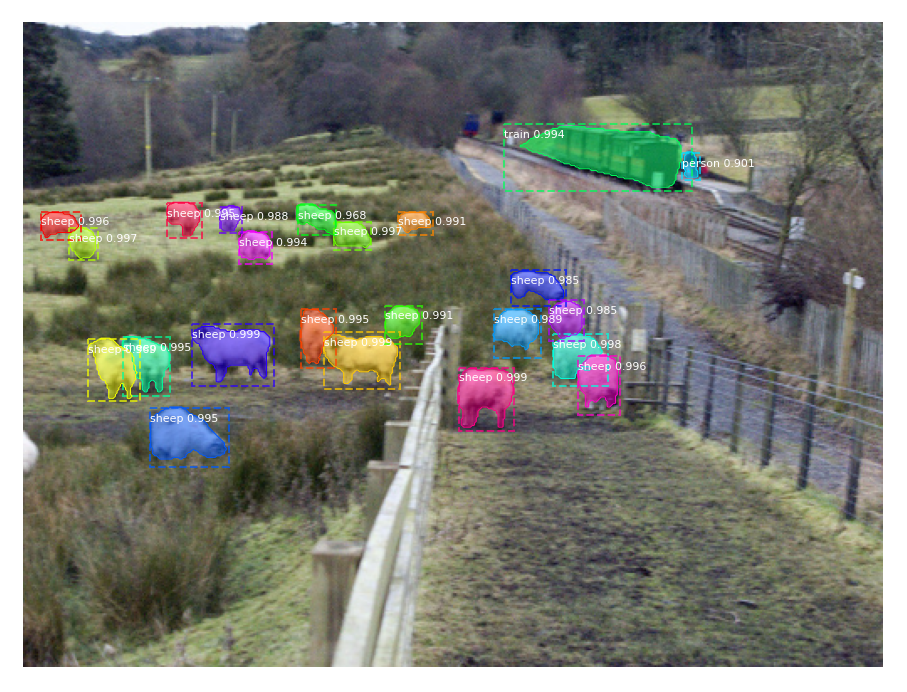

In [ ]:
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            CLASS_NAMES, r['scores'])


In [ ]:
import numpy as np

count_arr = []
for obj in range(len(r['scores'])):
  count = 0
  for row in r['masks']:
    for column in row:
      if column[obj] == True:
          count += 1
  count_arr.append(count)

index = np.argmax(count_arr)

print('Доля площади: ', np.round(count_arr[index]/image.shape[0]/image.shape[1],7))
cls_names = [CLASS_NAMES[i] for i in r['class_ids']]
print('Вероятность: ', np.round(r['scores'][index],3))
print('Метка класса: ', cls_names[index]) 
y1, x1, y2, x2 = r['rois'][index]
h = y2 - y1
w = x2 - x1
print('x,y,w,h: ', x1, y1, w, h)

Доля площади:  0.0110118
Вероятность:  0.994
Метка класса:  train
x,y,w,h:  286 60 112 40
